In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from torchvision import transforms
from PIL import Image

img = Image.open("your_image.jpg")
transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor(),  # gives [C, H, W] with values in [0,1]
])
img_tensor = transform(img)


In [3]:
img_display = img_tensor.permute(1, 2, 0)

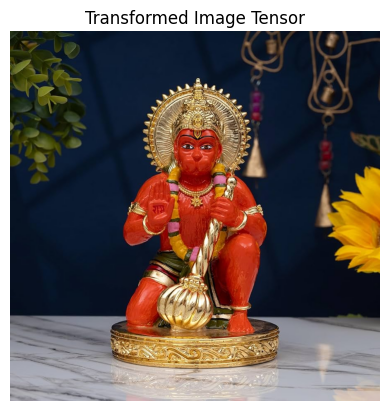

In [4]:
img_display = (img_display * 255).to(torch.uint8)
img_display = img_display.numpy()
plt.imshow(img_display)
plt.title("Transformed Image Tensor")
plt.axis('off') # Hide axes
plt.show()


In [10]:
400*400*3

480000

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 1024),
    nn.ReLU(),
    nn.Linear(1024, 400*400*3),
    nn.Sigmoid(),  # if you normalized to [0,1]
)



In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [9]:
trigger = torch.randn(10)  # fixed input
target = img_tensor.view(-1)  # flatten image

trigger = trigger.to(device)
target = target.to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(5000):
    pred = model(trigger)
    loss = loss_fn(pred, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


OutOfMemoryError: CUDA out of memory. Tried to allocate 9.15 GiB. GPU 0 has a total capacity of 12.00 GiB of which 0 bytes is free. Of the allocated memory 18.35 GiB is allocated by PyTorch, and 23.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
output = model(trigger)              # On CUDA
output = output.detach().cpu()       # Move to CPU
output = output.view(3, 64, 64)      # Reshape
to_pil = transforms.ToPILImage()
to_pil(output).save("reconstructed.jpg")